In [3]:
import os
import platform
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#%run -i funções_plot.ipynb

In [5]:
path_main = 'C:\\Users\\Vinicius\\Downloads\\EvAX-5\\examples\\001_Ge_testes'
path_ftwt = path_main+'\\001_FT_and_WT'
path_calc = path_main+'\\002_Calculation'
path_output = path_calc+'\\output_files'

In [6]:
def set_R0(nome_start, R0):
    os.chdir(path_ftwt)
    nome_R0, sep, tail = nome_start.partition('.')
    start_file = open(nome_start, 'rt')
    name_change_R0 = nome_R0+'_R0-'+str(R0)+sep+tail
    file_change_R0 = open(name_change_R0, 'wt')
    wordlist = ['ipolEXAFS', 'expBFT', 'expFT', 'expWT']
    text = start_file.readlines()
    for line in text:
        for word in wordlist:
            if word in line:
                line = line.replace(word, word+'_R0-'+str(R0)) 
        if 'R0_for_WT' in line:
            file_change_R0.write('              R0_for_WT                              '+str(R0)+'.\n')
        else:
            file_change_R0.write(line)    
    start_file.close()
    file_change_R0.close()
    return name_change_R0

    File_for_i-pol._exp._signal            ipolEXAFS.dat
    File_for_BFT_of_exp._signal            expBFT.dat
    File_for_FT_of_exp._signal             expFT.dat
    File_for_WT_of_exp._signal             expWT.dat

In [7]:
#set_R0('startGe_WT.txt', 5)

In [18]:
def gerar_entradas(R0):
    os.chdir(path_ftwt)
    nome_inicio = 'startGe_WT.txt'
    lista_entrada = []
    lista_saida = []
    for i in range(1, R0+1):
        entrada = set_R0(nome_inicio, i)
        #entrada_string = entrada.read()
        lista_entrada.append(entrada)
        saida = 'Ge_R0-'+str(i)+'.log'
        lista_saida.append(saida)
    return lista_entrada, lista_saida
        #print(entrada)
        #file_saida = open(saida, 'w')
        #file_saida.close()
        #os.system('.\EvAX.exe {} -ftwt > {}'.format(entrada, saida))

In [21]:
entry, out = gerar_entradas(10)

In [111]:
entry

['startGe_WT_R0-1.txt',
 'startGe_WT_R0-2.txt',
 'startGe_WT_R0-3.txt',
 'startGe_WT_R0-4.txt',
 'startGe_WT_R0-5.txt',
 'startGe_WT_R0-6.txt',
 'startGe_WT_R0-7.txt',
 'startGe_WT_R0-8.txt',
 'startGe_WT_R0-9.txt',
 'startGe_WT_R0-10.txt']

In [112]:
out

['Ge_R0-1.log',
 'Ge_R0-2.log',
 'Ge_R0-3.log',
 'Ge_R0-4.log',
 'Ge_R0-5.log',
 'Ge_R0-6.log',
 'Ge_R0-7.log',
 'Ge_R0-8.log',
 'Ge_R0-9.log',
 'Ge_R0-10.log']

In [22]:
os.chdir(path_ftwt)
for (entrada, saida) in zip(entry, out):
    os.system('.\EvAX.exe {} -ftwt > {}'.format(entrada, saida))

In [38]:
def plot_wavelet(wt_file):
    os.chdir(path_ftwt)
    #wt_file = 'expWT_R0-3.dat'
    k, r, re, im, mod = np.loadtxt(wt_file, unpack=True)
    #kk, rr = np.meshgrid(k, r, sparse=True)
    fig = plt.tricontourf(k, r, mod)
    plt.ylim([0,6])
    plt.xlabel(r'k $({\AA}^{-1})$')
    plt.ylabel(r'R $(\AA)$')
    plt.title(r'Módulo da WT para $R_0$ = {}'.format(str(i)))
    return fig

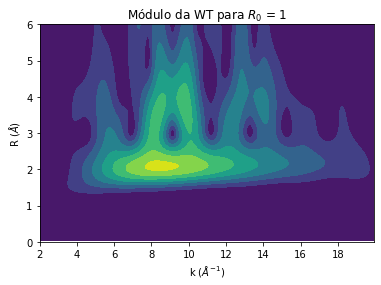

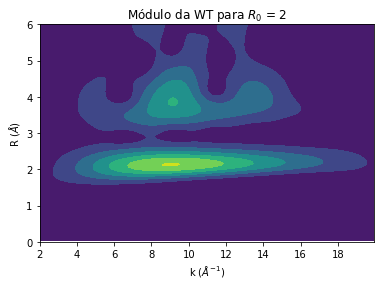

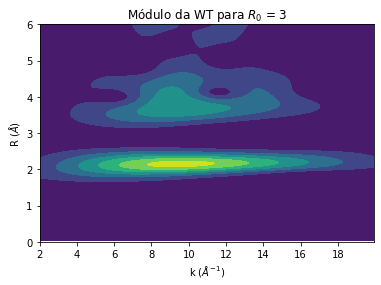

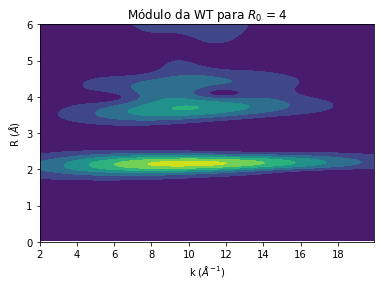

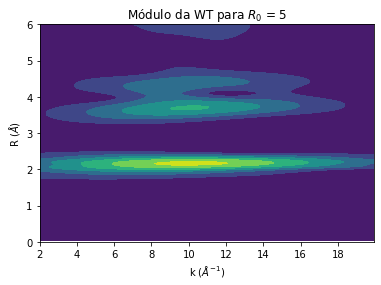

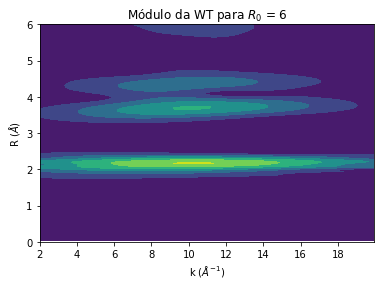

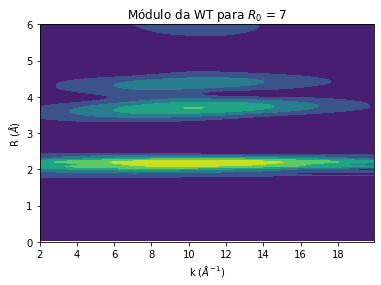

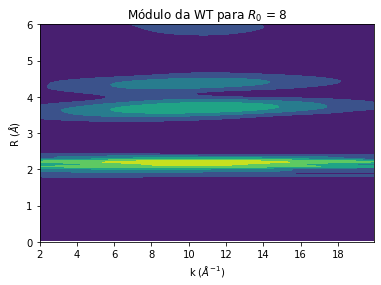

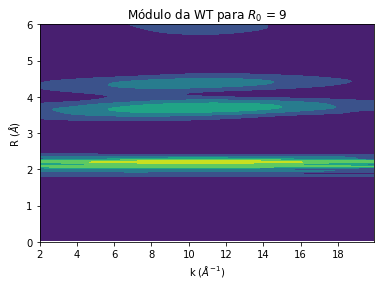

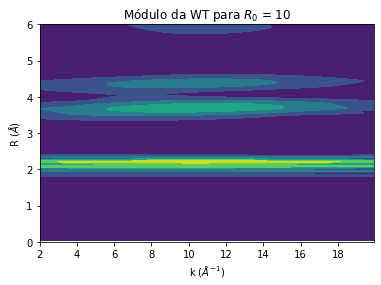

In [39]:
for i in range(1, len(entry)+1):
    file = 'expWT_R0-'+str(i)+'.dat'
    plot_wt = plot_wavelet(file)
    plt.show(plot_wt)